In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
# Configs
%config InlineBackend.figure_format ='retina'
%matplotlib inline

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn import base, neural_network, neighbors, feature_extraction, datasets, linear_model, metrics, model_selection, preprocessing, svm, ensemble, decomposition, feature_extraction, utils

import keras
import joblib

In [10]:
# Load Bridge helper classes
%run helpers/bridge.ipynb
%run helpers/load-data.ipynb
%run helpers/train-eval-utils.ipynb

In [13]:
# Loads & precomputes all the data, takes about 2.5min
data = load_deals()

In [170]:
# Concatenating features
X = [np.array([h.feature_array() for h in d.hands]).flatten()
     for d in data]

# Winners in a particular strain played from N
y_NT = [d.wnrs[strains.index('NT')]['N'] for d in data]
y_suit = [d.wnrs[strains.index('s')]['N'] for d in data]

In [ ]:
# PREVIOUS PERFORMANCE with old features, smaller dataset

# Features: Globally-defined X
#     Targets: Globally-defined y


#         M: Skl 1layNN #  test MAE: 0.76 - tr MAE: 0.72 - T: 256.4s # 40.2|86.2|97.8
#         M: HistGB     #  test MAE: 0.84 - tr MAE: 0.82 - T:   6.6s # 36.3|83.6|97.0
#         M: LinearRegr #  test MAE: 0.97 - tr MAE: 0.96 - T:   0.7s # 32.3|77.6|94.8


In [ ]:
#   10 iter = 1.5 min
#        M: Skl 1layNN #  test MAE: 0.80 - tr MAE: 0.79 - T: 59.6s # 38.0|84.9|97.5

#    200 iterations = 45 mins
#        M: Skl 1layNN #  test MAE: 0.73 - tr MAE: 0.70 - T: 2753.0s # 41.2|87.9|98.4

# 10 iter = 6 min
#        M: 4 layer 256 #  test MAE: 0.70 - tr MAE: 0.67 - T: 351.3s # 43.0|88.9|98.4
#        M: 7 layer 256 #  test MAE: 0.68 - tr MAE: 0.65 - T: 445.1s # 44.2|89.4|98.5
#           12 layer was same as 7, but worse training time

## results with mask instead
#        M: 7 layer 256 #  test MAE: 0.77 - tr MAE: 0.67 - T: 598.2s # 39.5|85.9|97.6


#    convergence = 44 iterations
#        M: Sklearn-NN #  test MAE: 0.61 - tr MAE: 0.50 - T: 6613.4s # 49.0|91.8|98.8


In [ ]:
# sklearn 2h on NT

# Features: Globally-defined X
#     Targets: Globally-defined y

#         M: Sklearn-NN #  test MAE: 0.61 - tr MAE: 0.50 - T: 6613.4s # 49.0|91.8|98.8
            
            
# sklearn 2h on s
# Features: Globally-defined X
#     Targets: SPADE WINNERS

#         M: Sklearn-NN #  test MAE: 0.45 - tr MAE: 0.37 - T: 5847.6s # 57.4|97.6|99.9



In [173]:
keras_m = train_eval_dds({'m': seq_model, 'desc': 'MLPNadamTan',
            'b_args': {'activation': 'relu', 'optimizer': keras.optimizers.Nadam(),
                       'layers_no': 6, 'dropout': False},
            'f_args': {'batch_size': 64, 'epochs': 100, 'verbose': 1, 'validation_split': 0.1}}, 
                         targets=[(y_NT, 'NT')], ret_model=True)  # 3min/epoch on CPU

Features: Globally-defined X
    Targets: NT

Train on 303550 samples, validate on 33728 samples
Epoch 1/100
303550/303550 [==============================] - 198s 653us/step - loss: 1.7451 - mean_absolute_error: 1.0073 - val_loss: 1.2809 - val_mean_absolute_error: 0.8853
Epoch 2/100
303550/303550 [==============================] - 116s 381us/step - loss: 1.2299 - mean_absolute_error: 0.8668 - val_loss: 1.1385 - val_mean_absolute_error: 0.8330
Epoch 3/100
303550/303550 [==============================] - 109s 358us/step - loss: 1.1307 - mean_absolute_error: 0.8290 - val_loss: 1.1490 - val_mean_absolute_error: 0.8366
Epoch 4/100
303550/303550 [==============================] - 108s 357us/step - loss: 1.0722 - mean_absolute_error: 0.8059 - val_loss: 1.0520 - val_mean_absolute_error: 0.7938
Epoch 5/100
303550/303550 [==============================] - 108s 357us/step - loss: 1.0331 - mean_absolute_error: 0.7897 - val_loss: 1.0326 - val_mean_absolute_error: 0.7894
Epoch 6/100
303550/303550 [=

303550/303550 [==============================] - 183s 604us/step - loss: 0.6854 - mean_absolute_error: 0.6360 - val_loss: 0.7811 - val_mean_absolute_error: 0.6759
Epoch 48/100
303550/303550 [==============================] - 199s 655us/step - loss: 0.6800 - mean_absolute_error: 0.6347 - val_loss: 0.7725 - val_mean_absolute_error: 0.6675
Epoch 49/100
303550/303550 [==============================] - 168s 552us/step - loss: 0.6752 - mean_absolute_error: 0.6325 - val_loss: 0.7816 - val_mean_absolute_error: 0.6767
Epoch 50/100
303550/303550 [==============================] - 141s 466us/step - loss: 0.6751 - mean_absolute_error: 0.6321 - val_loss: 0.7651 - val_mean_absolute_error: 0.6693
Epoch 51/100
303550/303550 [==============================] - 140s 460us/step - loss: 0.6743 - mean_absolute_error: 0.6311 - val_loss: 0.7613 - val_mean_absolute_error: 0.6635
Epoch 52/100
303550/303550 [==============================] - 140s 460us/step - loss: 0.6722 - mean_absolute_error: 0.6306 - val_loss

303550/303550 [==============================] - 108s 355us/step - loss: 0.6189 - mean_absolute_error: 0.6050 - val_loss: 0.7456 - val_mean_absolute_error: 0.6539
Epoch 94/100
303550/303550 [==============================] - 109s 358us/step - loss: 0.6170 - mean_absolute_error: 0.6039 - val_loss: 0.7411 - val_mean_absolute_error: 0.6512
Epoch 95/100
303550/303550 [==============================] - 110s 361us/step - loss: 0.6181 - mean_absolute_error: 0.6041 - val_loss: 0.7555 - val_mean_absolute_error: 0.6545
Epoch 96/100
303550/303550 [==============================] - 108s 356us/step - loss: 0.6172 - mean_absolute_error: 0.6034 - val_loss: 0.7544 - val_mean_absolute_error: 0.6564
Epoch 97/100
303550/303550 [==============================] - 109s 357us/step - loss: 0.6146 - mean_absolute_error: 0.6019 - val_loss: 0.7542 - val_mean_absolute_error: 0.6578
Epoch 98/100
303550/303550 [==============================] - 108s 357us/step - loss: 0.6149 - mean_absolute_error: 0.6027 - val_loss

In [174]:
joblib.dump(keras_m, 'models/ftarrays_to_dds_NT_keras.pkl') 

['models/ftarrays_to_dds_NT_keras.pkl']

In [ ]:
# 3 epochs

#    s     M: MLPNadamTan #  test MAE: 0.55 - tr MAE: 0.54 - T: 466.5s # 50.2|95.0|99.7

# 100 epochs
#   nt     M: MLPNadamTan #  test MAE: 0.61 - tr MAE: 0.55 - T: 15355.5s # 48.6|91.8|98.9
#    s     M: MLPNadamTan #  test MAE: 0.44 - tr MAE: 0.40 - T: 13424.1s # 57.8|97.9|99.9



In [189]:
# how to run more epochs
keras_m[0].fit(X, y_NT, validation_split=0.1, batch_size=64, epochs=200)

Train on 379438 samples, validate on 42160 samples
Epoch 1/200
379438/379438 [==============================] - 153s 404us/step - loss: 0.6523 - mean_absolute_error: 0.6181 - val_loss: 0.6650 - val_mean_absolute_error: 0.6236
Epoch 2/200
379438/379438 [==============================] - 151s 397us/step - loss: 0.6439 - mean_absolute_error: 0.6138 - val_loss: 0.6536 - val_mean_absolute_error: 0.6165
Epoch 3/200
379438/379438 [==============================] - 141s 372us/step - loss: 0.6450 - mean_absolute_error: 0.6143 - val_loss: 0.6601 - val_mean_absolute_error: 0.6190
Epoch 4/200
379438/379438 [==============================] - 136s 358us/step - loss: 0.6419 - mean_absolute_error: 0.6128 - val_loss: 0.6822 - val_mean_absolute_error: 0.6284
Epoch 5/200
379438/379438 [==============================] - 136s 359us/step - loss: 0.6411 - mean_absolute_error: 0.6127 - val_loss: 0.6594 - val_mean_absolute_error: 0.6195
Epoch 6/200
379438/379438 [==============================] - 136s 358us/st

379438/379438 [==============================] - 136s 358us/step - loss: 0.5998 - mean_absolute_error: 0.5938 - val_loss: 0.6933 - val_mean_absolute_error: 0.6320
Epoch 48/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.6067 - mean_absolute_error: 0.5969 - val_loss: 0.6865 - val_mean_absolute_error: 0.6286
Epoch 49/200
379438/379438 [==============================] - 136s 358us/step - loss: 0.6017 - mean_absolute_error: 0.5942 - val_loss: 0.6799 - val_mean_absolute_error: 0.6247
Epoch 50/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5981 - mean_absolute_error: 0.5925 - val_loss: 0.6815 - val_mean_absolute_error: 0.6264
Epoch 51/200
379438/379438 [==============================] - 136s 358us/step - loss: 0.6002 - mean_absolute_error: 0.5935 - val_loss: 0.6872 - val_mean_absolute_error: 0.6274
Epoch 52/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5983 - mean_absolute_error: 0.5929 - val_loss

379438/379438 [==============================] - 136s 357us/step - loss: 0.5797 - mean_absolute_error: 0.5840 - val_loss: 0.6881 - val_mean_absolute_error: 0.6258
Epoch 94/200
379438/379438 [==============================] - 136s 360us/step - loss: 0.5865 - mean_absolute_error: 0.5860 - val_loss: 0.6904 - val_mean_absolute_error: 0.6267
Epoch 95/200
379438/379438 [==============================] - 135s 357us/step - loss: 0.5796 - mean_absolute_error: 0.5838 - val_loss: 0.6984 - val_mean_absolute_error: 0.6339
Epoch 96/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5806 - mean_absolute_error: 0.5844 - val_loss: 0.6896 - val_mean_absolute_error: 0.6269
Epoch 97/200
379438/379438 [==============================] - 135s 357us/step - loss: 0.5780 - mean_absolute_error: 0.5829 - val_loss: 0.6996 - val_mean_absolute_error: 0.6287
Epoch 98/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5798 - mean_absolute_error: 0.5835 - val_loss

379438/379438 [==============================] - 135s 356us/step - loss: 0.5671 - mean_absolute_error: 0.5778 - val_loss: 0.6884 - val_mean_absolute_error: 0.6266
Epoch 140/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5721 - mean_absolute_error: 0.5797 - val_loss: 0.6927 - val_mean_absolute_error: 0.6248
Epoch 141/200
379438/379438 [==============================] - 136s 358us/step - loss: 0.5685 - mean_absolute_error: 0.5785 - val_loss: 0.6999 - val_mean_absolute_error: 0.6289
Epoch 142/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5679 - mean_absolute_error: 0.5778 - val_loss: 0.6984 - val_mean_absolute_error: 0.6300
Epoch 143/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5685 - mean_absolute_error: 0.5782 - val_loss: 0.6930 - val_mean_absolute_error: 0.6297
Epoch 144/200
379438/379438 [==============================] - 136s 358us/step - loss: 0.5665 - mean_absolute_error: 0.5769 - val

379438/379438 [==============================] - 135s 357us/step - loss: 0.5661 - mean_absolute_error: 0.5763 - val_loss: 0.6916 - val_mean_absolute_error: 0.6253
Epoch 186/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5573 - mean_absolute_error: 0.5724 - val_loss: 0.6918 - val_mean_absolute_error: 0.6218
Epoch 187/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5585 - mean_absolute_error: 0.5727 - val_loss: 0.6942 - val_mean_absolute_error: 0.6273
Epoch 188/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5578 - mean_absolute_error: 0.5727 - val_loss: 0.6873 - val_mean_absolute_error: 0.6215
Epoch 189/200
379438/379438 [==============================] - 136s 357us/step - loss: 0.5566 - mean_absolute_error: 0.5718 - val_loss: 0.6897 - val_mean_absolute_error: 0.6226
Epoch 190/200
379438/379438 [==============================] - 136s 358us/step - loss: 0.5573 - mean_absolute_error: 0.5721 - val

In [190]:
joblib.dump(keras_m, 'models/ftarrays_to_dds_NT_keras.pkl') 

['models/ftarrays_to_dds_NT_keras.pkl']

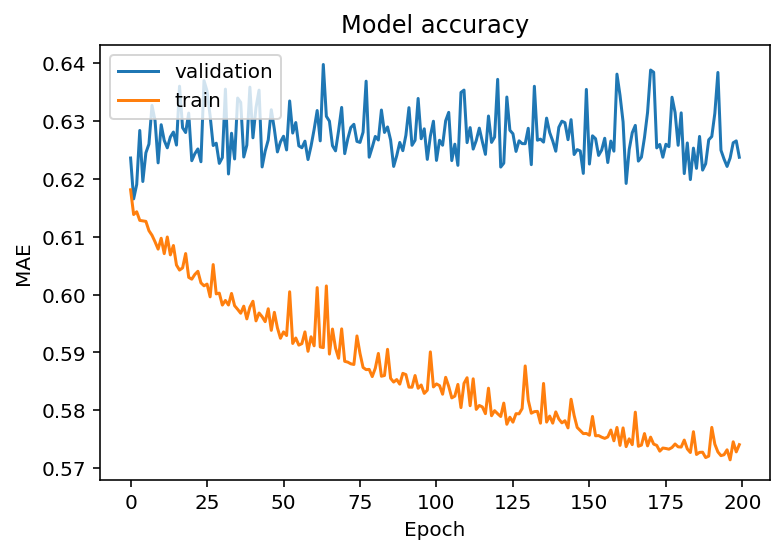

In [191]:

import matplotlib.pyplot as plt

history = keras_m[0].history

# Plot training & validation accuracy values
plt.plot(history.history['val_mean_absolute_error'])
plt.plot(history.history['mean_absolute_error'])
plt.title('Model accuracy')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['validation', 'train'], loc='upper left')
plt.show()
